In [1]:
# July 16th  Online shopping



#### problem statements
(1)customer Segmentation (clustering) on the basis of their buying patter (Recency,Frequency,Monetary)
(2)Identify the business trend- Day,Month,Season,Time by Invoice count.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [3]:
import sqlite3
import pandas as pd

# Connect to SQLite3 database
conn = sqlite3.connect('shopping.db')

# Write your SQL query to fetch data from the database
sql_query = """
SELECT * FROM shopping;
"""

# Execute the SQL query and fetch data into a Pandas DataFrame
data = pd.read_sql_query(sql_query, conn)

# Close the connection to the database
conn.close()


In [4]:
df=data.copy()
df.head()

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
print(test_df.head())

Train set shape: (433527, 9)
Test set shape: (108382, 9)
       InvoiceNo StockCode lower                       Description  Quantity  \
209268    555200     71459  None    HANGING JAM JAR T-LIGHT HOLDER        24   
207108    554974     21128  None                GOLD FISHING GNOME         4   
167085    550972     21086  None       SET/6 RED SPOTTY PAPER CUPS         4   
471836    576652     22812  None  PACK 3 BOXES CHRISTMAS PANETTONE         3   
115865    546157     22180  None                    RETROSPOT LAMP         2   

           InvoiceDate  UnitPrice  CustomerID         Country  
209268    6/1/11 12:05       0.85     17315.0  United Kingdom  
207108   5/27/11 17:14       6.95     14031.0  United Kingdom  
167085   4/21/11 17:05       0.65     14031.0  United Kingdom  
471836  11/16/11 10:39       1.95     17198.0  United Kingdom  
115865    3/10/11 8:40       9.95     13502.0  United Kingdom  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   lower        1816 non-null    object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


In [6]:
# to solve the first problem --- clustering on basis of R F M
# we drop the unwanted columns

In [7]:
df1=df.drop(["StockCode","lower","Description","Country"],axis=1)

In [8]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,12/1/10 8:26,2.55,17850.0
1,536365,6,12/1/10 8:26,3.39,17850.0
2,536365,8,12/1/10 8:26,2.75,17850.0
3,536365,6,12/1/10 8:26,3.39,17850.0
4,536365,6,12/1/10 8:26,3.39,17850.0


In [9]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [10]:
# as we are working on customer clustering  we can not impute customer id , if it is not there.

In [11]:
df1.dropna(axis=0,inplace=True)

In [12]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [13]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [15]:
# The quantity is -ve bcoz of return or defective item
# Unit price can be zero becoz of some offer

In [16]:
df1[df1["UnitPrice"]==0]["UnitPrice"].count()

40

In [17]:
df1[df1["UnitPrice"]==0].head(20)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,12/5/10 14:02,0.0,12647.0
33576,539263,4,12/16/10 14:36,0.0,16560.0
40089,539722,10,12/21/10 13:45,0.0,14911.0
47068,540372,24,1/6/11 16:41,0.0,13081.0
47070,540372,24,1/6/11 16:41,0.0,13081.0
56674,541109,1,1/13/11 15:10,0.0,15107.0
86789,543599,16,2/10/11 13:08,0.0,17560.0
130188,547417,36,3/23/11 10:25,0.0,13239.0
139453,548318,5,3/30/11 12:45,0.0,13113.0
145208,548871,2,4/4/11 14:42,0.0,14410.0


In [18]:
# we want to continue with only those observation having +ve quantity

In [19]:
df1=df1[df1["Quantity"]>0]

In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00


In [21]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,12/1/10 8:26,2.55,17850.0
1,536365,6,12/1/10 8:26,3.39,17850.0
2,536365,8,12/1/10 8:26,2.75,17850.0
3,536365,6,12/1/10 8:26,3.39,17850.0
4,536365,6,12/1/10 8:26,3.39,17850.0


In [22]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]

In [23]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,12/1/10 8:26,2.55,17850.0,15.30
1,536365,6,12/1/10 8:26,3.39,17850.0,20.34
2,536365,8,12/1/10 8:26,2.75,17850.0,22.00
3,536365,6,12/1/10 8:26,3.39,17850.0,20.34
4,536365,6,12/1/10 8:26,3.39,17850.0,20.34


In [24]:
# drop the column Quantity  Unit price

In [25]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)

In [26]:
df2.head(100)

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,12/1/10 8:26,17850.0,15.30
1,536365,12/1/10 8:26,17850.0,20.34
2,536365,12/1/10 8:26,17850.0,22.00
3,536365,12/1/10 8:26,17850.0,20.34
4,536365,12/1/10 8:26,17850.0,20.34
...,...,...,...,...
95,536378,12/1/10 9:37,14688.0,15.30
96,536378,12/1/10 9:37,14688.0,50.40
97,536378,12/1/10 9:37,14688.0,13.20
98,536378,12/1/10 9:37,14688.0,13.20


In [27]:
# groupby approach - to generate the final invoice

In [28]:
df_final=df2.groupby(["InvoiceNo","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [29]:
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,12/1/10 8:26,17850.0,139.12
1,536366,12/1/10 8:28,17850.0,22.20
2,536367,12/1/10 8:34,13047.0,278.73
3,536368,12/1/10 8:34,13047.0,70.05
4,536369,12/1/10 8:35,13047.0,17.85
...,...,...,...,...
18561,581583,12/9/11 12:23,13777.0,124.60
18562,581584,12/9/11 12:25,13777.0,140.64
18563,581585,12/9/11 12:31,15804.0,329.05
18564,581586,12/9/11 12:49,13113.0,339.20


#### now we want to calculate Recency, Frequency,Monetary
Recency=(last business date as per record)- last purchse date(of a particular customer)
Frequency= counting of different  invoice no. w.r.to a particular customer
Monetary=Summation of Total w.r.to a particular customer

In [30]:
# we will use groupby -- keeping customer_id as reference

In [31]:
# calcualte the last business date as per dataset

In [32]:
max(df_final["InvoiceDate"])

'9/9/11 9:52'

In [33]:
min(df_final["InvoiceDate"])

'1/10/11 10:32'

In [34]:
#last business date as per dataset=2011-12-09 12:50:00
# we have 12 month of data(approx)

In [35]:
# basically we want the recency in days -- not in hour, minutes etc

latest_data or last date of business-- if we add 1 day extra the recency will be only in days .
not in hour or minutes

In [36]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [37]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,12/1/10 8:26,17850.0,139.12
1,536366,12/1/10 8:28,17850.0,22.20
2,536367,12/1/10 8:34,13047.0,278.73
3,536368,12/1/10 8:34,13047.0,70.05
4,536369,12/1/10 8:35,13047.0,17.85


In [38]:
# we will use groupby -- keeping customer_id as reference

In [39]:
"""RFM_score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()"""


# Convert 'InvoiceDate' column to datetime
df_final['InvoiceDate'] = pd.to_datetime(df_final['InvoiceDate'])

# Calculate RFM scores
RFM_score = df_final.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,
    "InvoiceNo": lambda x: x.count(),
    "Total": lambda x: x.sum()
}).reset_index()


In [40]:
RFM_score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [41]:
# lets rename it as per the actual calculation

In [42]:
RFM_score=RFM_score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [43]:
RFM_score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [44]:
RFM_score.shape

(4339, 4)

In [45]:
# lest find the marks on the basis of ranking in individual R F M

In [46]:
RFM_score["R_marks"]=RFM_score["Recency"].rank(ascending=False)
RFM_score["R_marks"]

0        162.5
1       4156.5
2       1646.0
3       3209.5
4        227.5
         ...  
4334     355.0
4335     860.0
4336    3839.5
4337    4064.5
4338    2357.0
Name: R_marks, Length: 4339, dtype: float64

In [47]:
# Frequency marks with respect to rank

In [48]:
RFM_score["F_marks"]=RFM_score["Frequency"].rank(ascending=True)
RFM_score["F_marks"]

0        746.5
1       3709.5
2       3028.0
3        746.5
4        746.5
         ...  
4334     746.5
4335     746.5
4336    1910.5
4337    4182.5
4338    2581.5
Name: F_marks, Length: 4339, dtype: float64

In [49]:
# Monetary marks with respect to rank

In [50]:
RFM_score["M_marks"]=RFM_score["Monetary"].rank(ascending=True)
RFM_score["M_marks"]

0       4330.0
1       4004.0
2       3334.0
3       3306.0
4       1230.0
         ...  
4334     564.0
4335     105.0
4336     547.0
4337    3489.0
4338    3357.0
Name: M_marks, Length: 4339, dtype: float64

In [51]:
RFM=RFM_score.copy()

In [52]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [53]:
# lets convert the marks with respect to 100 marks

In [54]:
RFM["R_final"]=(RFM["R_marks"]/RFM["R_marks"].max())*100

In [55]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767


In [56]:
RFM["F_final"]=(RFM["F_marks"]/RFM["F_marks"].max())*100

In [57]:
RFM["M_final"]=(RFM["M_marks"]/RFM["M_marks"].max())*100

In [58]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [59]:
RFM["RFM_final"]=0.30*RFM["R_final"]+0.30*RFM["F_final"]+0.50*RFM["M_final"]

In [60]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579,56.185567
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327,100.638504
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981,70.779956
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671,65.535544
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546,20.914230


In [61]:
RFM=RFM.round(2)
RFM.head(2)

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final
0,12346.0,325,1,77183.6,162.5,746.5,4330.0,3.76,17.20,99.79,56.19
1,12347.0,2,7,4310.0,4156.5,3709.5,4004.0,96.17,85.49,92.28,100.64


In [62]:
# lets we want to create four groups

In [63]:
Loyality_label=["Silver","Gold","Diamond","Platinum"]

In [64]:
Quantile=RFM["RFM_final"].quantile(q=[0.25,0.50,0.75])

In [65]:
Quantile

0.25    31.50
0.50    53.75
0.75    77.75
Name: RFM_final, dtype: float64

In [66]:
# lets visualize the percentile to decide the quantile

In [67]:
# ecdf--:- emperical cummulative distribution function plot

<AxesSubplot:xlabel='RFM_final', ylabel='Proportion'>

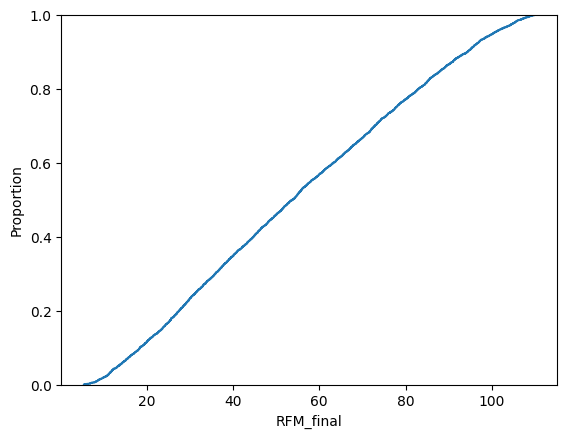

In [68]:
sns.ecdfplot(data=RFM["RFM_final"])

In [69]:
# write a function to assign the customer in different group as per their marks and quantile approach

In [70]:
def loyality(x):
    if x<=31:
        return "Silver"
    elif x<=54:
        return "Gold"
    elif x<=78:
        return "Diamond"
    else:
        return "Platinum"


In [71]:
RFM["Loyality"]=RFM["RFM_final"].apply(loyality)

In [72]:
RFM.head(20)

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final,Loyality
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,56.19,Diamond
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,100.64,Platinum
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,70.78,Diamond
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,65.54,Diamond
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.91,Silver
5,12352.0,36,8,2506.04,2502.5,3828.0,3638.0,57.90,88.22,83.84,85.76,Platinum
6,12353.0,204,1,89.00,725.5,746.5,117.0,16.79,17.20,2.70,11.55,Silver
7,12354.0,232,1,1079.40,602.5,746.5,2780.0,13.94,17.20,64.07,41.38,Gold
8,12355.0,214,1,459.40,672.5,746.5,1660.0,15.56,17.20,38.26,28.96,Silver
9,12356.0,22,3,2811.43,3037.5,2581.5,3739.0,70.28,59.50,86.17,82.02,Platinum


In [73]:
RFM["Loyality"].value_counts()

Gold        1120
Diamond     1088
Platinum    1073
Silver      1058
Name: Loyality, dtype: int64

In [74]:
# we can do the cutomer segmentation with Kmeans clustering algorithm

In [75]:
Newdata=RFM["RFM_final"]
Newdata

0        56.19
1       100.64
2        70.78
3        65.54
4        20.91
         ...  
4334     14.12
4335     12.34
4336     46.16
4337     97.34
4338     72.89
Name: RFM_final, Length: 4339, dtype: float64

In [76]:
Newdata=pd.DataFrame(Newdata)

In [77]:
from sklearn.cluster import KMeans

In [78]:
kmeans1=KMeans(n_clusters=4,max_iter=100,random_state=100)
y_kmeans=kmeans1.fit_predict(Newdata)
y_kmeans

array([2, 0, 3, ..., 2, 0, 3])

In [79]:
RFM["Cluster"]=kmeans1.labels_

In [80]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final,RFM_final,Loyality,Cluster
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.76,17.20,99.79,56.19,Diamond,2
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.17,85.49,92.28,100.64,Platinum,0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.08,69.79,76.84,70.78,Diamond,3
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.26,17.20,76.19,65.54,Diamond,3
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.26,17.20,28.35,20.91,Silver,1


In [81]:
RFM["Cluster"].value_counts()

1    1214
2    1179
3    1034
0     912
Name: Cluster, dtype: int64

In [82]:
RFM["Loyality"].value_counts()

Gold        1120
Diamond     1088
Platinum    1073
Silver      1058
Name: Loyality, dtype: int64

In [83]:
# how to find the best no. of cluster --- elbow method -- SSE error calculate

In [84]:
# calculate the silhouette_score

Text(0, 0.5, 'Sum of square error')

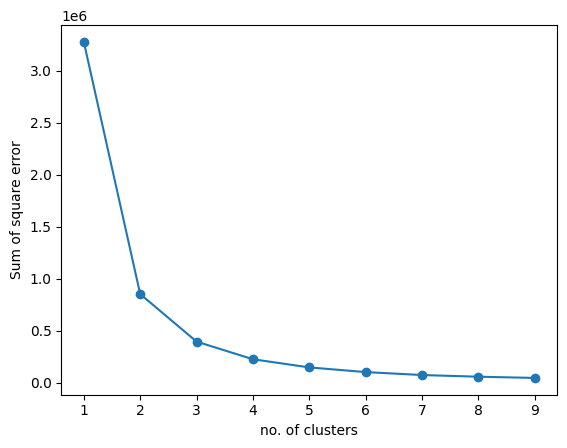

In [85]:
SSE=[]
for i in range(1,10):
    kmeans1=KMeans(max_iter=100,random_state=100,n_clusters=i)
    kmeans1.fit_predict(Newdata)
    SSE.append(kmeans1.inertia_)

plt.plot(range(1,10),SSE,marker="o")
plt.xlabel("no. of clusters")
plt.ylabel("Sum of square error")

#pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
model=kmenas1
visualizer=KElbowVisualizer(model,k=(1,10)).fit(Newdata)
visualizer.show()

In [86]:
#evaluation of clustering

In [87]:
from sklearn.metrics import silhouette_score

In [88]:
labels=kmeans1.labels_


In [89]:
silhouette_score(Newdata,labels)

0.5344319358734617

In [90]:
# goal no. 2 --- Analysing of business trend as per day, month, weekend,season,
# timing etc...

In [91]:
df10=data.copy()

In [92]:
df10.head(2)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [93]:
df10=df10.drop(["StockCode","Description","lower","Country"],axis=1)

In [94]:
df10.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,12/1/10 8:26,2.55,17850.0
1,536365,6,12/1/10 8:26,3.39,17850.0


In [95]:
df10["Total"]=df10["Quantity"]*df10["UnitPrice"]

In [96]:
df10=df10.drop(["Quantity","UnitPrice"],axis=1)

In [97]:
df10.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,12/1/10 8:26,17850.0,15.30
1,536365,12/1/10 8:26,17850.0,20.34


In [98]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   Total        541909 non-null  float64
dtypes: float64(2), object(2)
memory usage: 16.5+ MB


In [99]:
import datetime as dt

In [100]:
"""#Extraction of day
df10["Day"]=df10["InvoiceDate"].dt.day_name()"""


# Convert 'InvoiceDate' column to datetime
df10['InvoiceDate'] = pd.to_datetime(df10['InvoiceDate'])

# Extract day name
df10["Day"] = df10["InvoiceDate"].dt.day_name()


In [101]:
df10.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day
0,536365,2010-12-01 08:26:00,17850.0,15.30,Wednesday
1,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday
2,536365,2010-12-01 08:26:00,17850.0,22.00,Wednesday
3,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday
4,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday


In [102]:
df10["Day"].value_counts()

Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: Day, dtype: int64

In [103]:
#Extraction of Month

df10["Month"]=df10["InvoiceDate"].dt.month


In [104]:
#Extraction of Hour
df10["Hour"]=df10["InvoiceDate"].dt.hour

In [105]:
df10.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour
0,536365,2010-12-01 08:26:00,17850.0,15.30,Wednesday,12,8
1,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8
2,536365,2010-12-01 08:26:00,17850.0,22.00,Wednesday,12,8
3,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8
4,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8


In [106]:
# creation of season on the basis of month

In [107]:
def cal_season(x):
    if x in [10,11,12,1]:
        return "Winter"
    if x in [2,3]:
        return "Spring"
    if x in [4,5,6]:
        return "Summer"
    else:
        return "Monsoon"

In [108]:
# creation of timing on the basis of hour

In [109]:
def cal_timing(x):
    if x in range(0,5):
        return "early morning"
    if x in range(5,11):
        return "Morning"
    if x in range(11,16):
        return "afternoon"
    else:
        return "evening"

In [110]:
df10["season"]=df10["Month"].apply(cal_season)

In [111]:
df10["timing"]=df10["Hour"].apply(cal_timing)

In [112]:
df10.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,season,timing
0,536365,2010-12-01 08:26:00,17850.0,15.30,Wednesday,12,8,Winter,Morning
1,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8,Winter,Morning
2,536365,2010-12-01 08:26:00,17850.0,22.00,Wednesday,12,8,Winter,Morning
3,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8,Winter,Morning
4,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8,Winter,Morning


In [113]:
df10.shape

(541909, 9)

In [114]:
df10["season"].value_counts()

Winter     248606
Monsoon    125028
Summer     103820
Spring      64455
Name: season, dtype: int64

In [115]:
df10["timing"].value_counts()

afternoon    353632
evening       95575
Morning       92702
Name: timing, dtype: int64

In [116]:
# create a weekend column

In [117]:
df10["Weekend"]=np.where((df10.Day=="Saturday")|(df10.Day=="Sunday"),"Weekend","Weekday")

In [118]:
df10.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,season,timing,Weekend
0,536365,2010-12-01 08:26:00,17850.0,15.30,Wednesday,12,8,Winter,Morning,Weekday
1,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8,Winter,Morning,Weekday


In [119]:
df10["Month_name"]=df10["InvoiceDate"].dt.month_name()

In [120]:
df10.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,season,timing,Weekend,Month_name
0,536365,2010-12-01 08:26:00,17850.0,15.30,Wednesday,12,8,Winter,Morning,Weekday,December
1,536365,2010-12-01 08:26:00,17850.0,20.34,Wednesday,12,8,Winter,Morning,Weekday,December


In [121]:
# analysing the most busy day

In [122]:
day_count=df10.groupby("Day")["InvoiceNo"].count().to_frame("no.of invoices").reset_index()

In [123]:
day_count

,Day,no.of invoices
0,Friday,82193
1,Monday,95111
2,Sunday,64375
3,Thursday,103857
4,Tuesday,101808
5,Wednesday,94565


In [124]:
#creation of pieplot

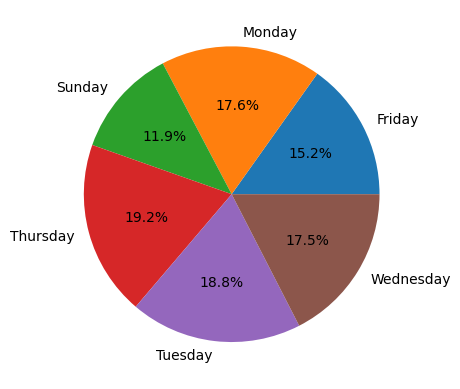

In [125]:
plt.pie(day_count["no.of invoices"],labels=day_count["Day"],autopct="%.1f%%")
plt.show()

<AxesSubplot:xlabel='Day', ylabel='no.of invoices'>

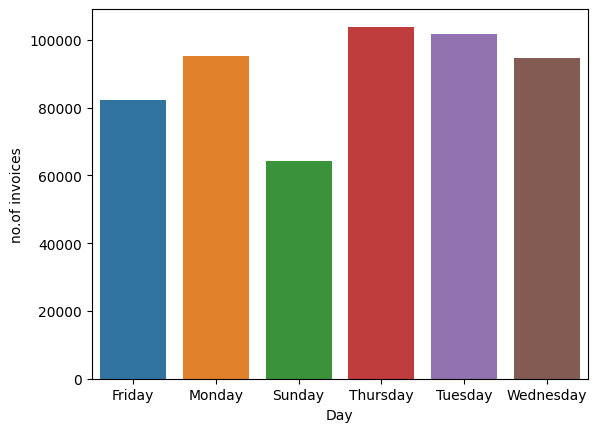

In [126]:
sns.barplot(x=day_count.Day,y=day_count["no.of invoices"])

In [127]:
season_count=df10.groupby("season")["InvoiceNo"].count().to_frame("no.of invoices").reset_index()

In [128]:
season_count

,season,no.of invoices
0,Monsoon,125028
1,Spring,64455
2,Summer,103820
3,Winter,248606


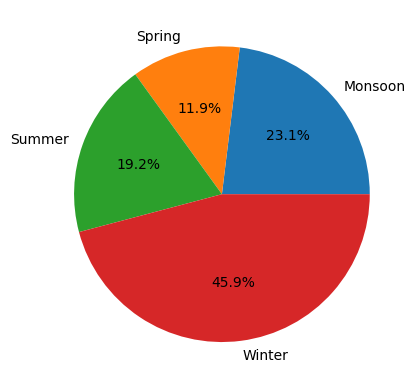

In [129]:
plt.pie(season_count["no.of invoices"],labels=season_count["season"],autopct="%.1f%%")
plt.show()

<AxesSubplot:xlabel='season', ylabel='no.of invoices'>

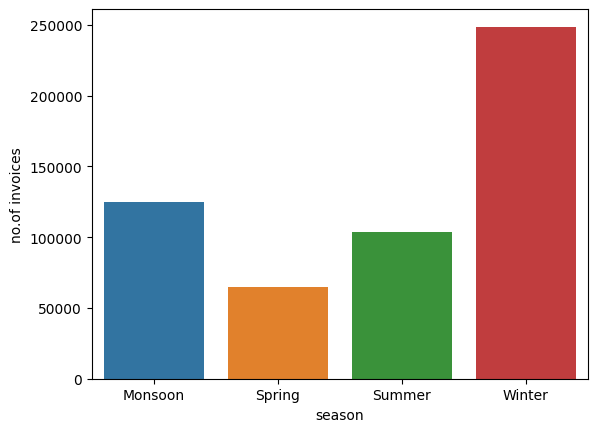

In [130]:
sns.barplot(x=season_count.season,y=season_count["no.of invoices"])

In [131]:
# Time series Revenue

In [132]:
df10["Total"].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Total, dtype: float64

In [133]:
monthly_revenue=df10.set_index("InvoiceDate")["Total"].resample("M").sum()

In [134]:
monthly_revenue

InvoiceDate
2010-12-31     748957.020
2011-01-31     560000.260
2011-02-28     498062.650
2011-03-31     683267.080
2011-04-30     493207.121
2011-05-31     723333.510
2011-06-30     691123.120
2011-07-31     681300.111
2011-08-31     682680.510
2011-09-30    1019687.622
2011-10-31    1070704.670
2011-11-30    1461756.250
2011-12-31     433668.010
Freq: M, Name: Total, dtype: float64

([<matplotlib.axis.XTick at 0x27760b6f2c8>,
 [Text(0, 0, '12.2010'),
  Text(1, 0, '01.2011'),
  Text(2, 0, '02.2011'),
  Text(3, 0, '03.2011'),
  Text(4, 0, '04.2011'),
  Text(5, 0, '05.2011'),
  Text(6, 0, '06.2011'),
  Text(7, 0, '07.2011'),
  Text(8, 0, '08.2011'),
  Text(9, 0, '09.2011'),
  Text(10, 0, '10.2011'),
  Text(11, 0, '11.2011'),
  Text(12, 0, '12.2011')])

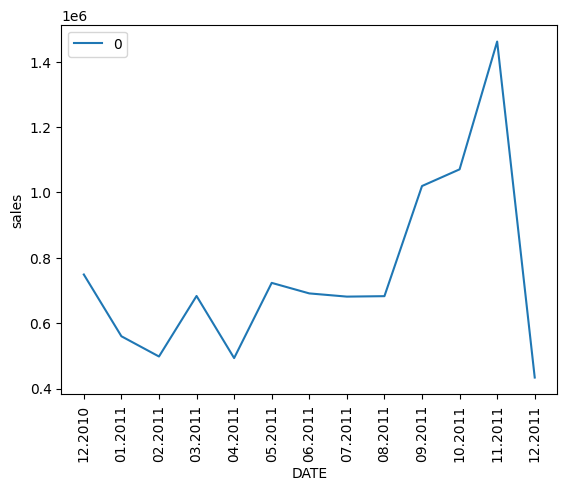

In [135]:
ax=pd.DataFrame(monthly_revenue.values).plot()
ax.set_xlabel("DATE")
ax.set_ylabel("sales")
plt.xticks(range(len(monthly_revenue.index)),[x.strftime("%m.%Y")for x in monthly_revenue.index],rotation=90)

#More problem we can solve-- it will be a 10-15 days duration project
#In ur Resume you can mention its a 3 month project
(1)Repeat customer information
(2)percentage of business from repeat customer
(3)Plot business revenue graph All customer vs repeat customer
(4)find the Customer life time valuation(LTV)
# after the calculation of LTV , we can use this column as dependent variable.
# we can train our model (Regression problem) for future predition of a customer--- LTV


# Most important

# Recommendation Engine

-->data filteration system which operate on different ML algorithm to recommend
product services etc.
--> it works on the principal of finding pattern / similarity in services,
product

In [136]:
# NLP -- Natural language processing -- based many recommendation engine and
#filteration approach.

Different techniques--

(1)Collaborative filtering-- analyze the data -- online activities,
product preference
based on the similarities with other users-- it uses the matrix style formule
# similar to correlation matrix
it calculate the degree of similaries between two customers.
and recommend the product, service accordingly.

Amit---purchased Book A, BOOK B,BOOK C
pRIYA --- Purchased A,B,D

For Amit-- Book D will recommendation
For Priya-  Book C will recommend


(2)Content based--- work on the principal of describing a product.

(3)Hybrid Model--meta collaboration of Collaborative & content based filtering

In [137]:
df100=data.copy()

In [138]:
df100.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [139]:
df100.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [140]:
df100=df100.drop(["lower"],axis=1)

In [141]:
df100.dropna(axis=0,inplace=True)

In [142]:
df100.shape

(406829, 8)

In [143]:
# cosine_similarity-- function
# it give us the degree of similarities

In [144]:
df100.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [145]:
# creation of pivot_table is required--
# We are creating customerID based Matrix
# On this metrix we will apply the cosine similarity

In [146]:
custID_matrix=df100.pivot_table(index="CustomerID",columns="StockCode",values="Quantity",aggfunc="sum")

In [147]:
custID_matrix.tail()

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
18287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
custID_matrix=custID_matrix.applymap(lambda x:1 if x>0 else 0)

In [149]:
custID_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
# we want to find the degree of similarities between customer.. on the basis of
# product they have purchased.

In [151]:
from sklearn.metrics.pairwise import cosine_similarity

In [152]:
similarity=cosine_similarity(custID_matrix)

In [153]:
similarity.shape

(4372, 4372)

In [154]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.06302187, ..., 0.11377602, 0.10936441,
        0.01282789],
       [0.        , 0.06302187, 1.        , ..., 0.        , 0.17090475,
        0.08326911],
       ...,
       [0.        , 0.11377602, 0.        , ..., 1.        , 0.01780047,
        0.        ],
       [0.        , 0.10936441, 0.17090475, ..., 0.01780047, 1.        ,
        0.09633351],
       [0.        , 0.01282789, 0.08326911, ..., 0.        , 0.09633351,
        1.        ]])

In [155]:
final=pd.DataFrame(similarity,columns=custID_matrix.index)

In [156]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [157]:
final=final.set_index(custID_matrix.index)

In [158]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [159]:
import pickle

# Save the cosine similarity matrix as a pickle file
with open('cosine_similarity.pkl', 'wb') as f:
    pickle.dump(final, f)

# Save the customer-item matrix as a pickle file
with open('customer_item_matrix.pkl', 'wb') as f:
    pickle.dump(custID_matrix, f)


In [160]:
# just take the reference of a customer

In [161]:
final.loc[12347].sort_values(ascending=False)

CustomerID
12347.0    1.000000
17396.0    0.301694
13324.0    0.256186
13759.0    0.241355
16855.0    0.226050
             ...   
15049.0    0.000000
16965.0    0.000000
16963.0    0.000000
16961.0    0.000000
12346.0    0.000000
Name: 12347.0, Length: 4372, dtype: float64

In [162]:
# assume cust_A= 12347---- item purchased by him
# assume cust_B= 17396---- item purchased by him

In [163]:
item_cust_A=set(custID_matrix.loc[12347].iloc[custID_matrix.loc[12347].to_numpy().nonzero()].index)

In [164]:
item_cust_A

{'16008',
 '17021',
 '20665',
 '20719',
 '20780',
 '20782',
 '20966',
 '21035',
 '21041',
 '21064',
 '21154',
 '21171',
 '21265',
 '21578',
 '21636',
 '21731',
 '21791',
 '21832',
 '21975',
 '21976',
 '22131',
 '22134',
 '22195',
 '22196',
 '22212',
 '22252',
 '22371',
 '22372',
 '22374',
 '22375',
 '22376',
 '22417',
 '22422',
 '22423',
 '22432',
 '22492',
 '22494',
 '22497',
 '22550',
 '22561',
 '22621',
 '22697',
 '22698',
 '22699',
 '22725',
 '22726',
 '22727',
 '22728',
 '22729',
 '22771',
 '22772',
 '22773',
 '22774',
 '22775',
 '22805',
 '22821',
 '22945',
 '22992',
 '23076',
 '23084',
 '23146',
 '23147',
 '23162',
 '23170',
 '23171',
 '23172',
 '23173',
 '23174',
 '23175',
 '23177',
 '23271',
 '23297',
 '23308',
 '23316',
 '23420',
 '23421',
 '23422',
 '23480',
 '23497',
 '23503',
 '23506',
 '23508',
 '23552',
 '47559B',
 '47567B',
 '47580',
 '51014C',
 '71477',
 '84558A',
 '84559A',
 '84559B',
 '84625A',
 '84625C',
 '84969',
 '84991',
 '84992',
 '84997B',
 '84997C',
 '84997D',

In [165]:
item_cust_B=set(custID_matrix.loc[17396].iloc[custID_matrix.loc[17396].to_numpy().nonzero()].index)

In [166]:
item_cust_B

{'22141',
 '22142',
 '22144',
 '22191',
 '22192',
 '22193',
 '22423',
 '22697',
 '22698',
 '22699',
 '22725',
 '22726',
 '22727',
 '22728',
 '22729',
 '22730',
 '23170',
 '23171',
 '23172',
 '23173',
 '23174',
 '23175',
 '23245',
 'M'}

In [167]:
Recommended_item_cust_A=item_cust_B-item_cust_A

In [168]:
Recommended_item_cust_A

{'22141', '22142', '22144', '22191', '22192', '22193', '22730', '23245', 'M'}

In [169]:
df100.loc[df100["StockCode"].isin(Recommended_item_cust_A),["StockCode","Description"]].drop_duplicates().set_index("StockCode")

,Description
StockCode,
22193,RED DINER WALL CLOCK
22192,BLUE DINER WALL CLOCK
22191,IVORY DINER WALL CLOCK
22730,ALARM CLOCK BAKELIKE IVORY
22141,CHRISTMAS CRAFT TREE TOP ANGEL
22144,CHRISTMAS CRAFT LITTLE FRIENDS
22142,CHRISTMAS CRAFT WHITE FAIRY
M,Manual
23245,SET OF 3 REGENCY CAKE TINS


In [170]:
def recommend_items(customer_id, custID_matrix, df100):
    # Find the most similar customer based on cosine similarity
    similar_customer = final.loc[customer_id].sort_values(ascending=False).index[1]
    
    # Get the items purchased by the input customer
    items_customer_id = set(custID_matrix.loc[customer_id].iloc[custID_matrix.loc[customer_id].to_numpy().nonzero()].index)
    
    # Get the items purchased by the similar customer
    items_similar_customer = set(custID_matrix.loc[similar_customer].iloc[custID_matrix.loc[similar_customer].to_numpy().nonzero()].index)
    
    # Find the items recommended to the input customer
    recommended_items = items_similar_customer - items_customer_id
    
    # Filter out the recommended items from the dataframe and drop duplicates
    recommended_items_df = df100.loc[df100["StockCode"].isin(recommended_items), ["StockCode", "Description"]].drop_duplicates().set_index("StockCode")
    
    return recommended_items_df


In [171]:
recommendations = recommend_items(17396, custID_matrix, df100)
print(recommendations)


                              Description
StockCode                                
22926      IVORY GIANT GARDEN THERMOMETER
22583        PACK OF 6 HANDBAG GIFT BOXES
22584      PACK OF 6 PANNETONE GIFT BOXES
22605           WOODEN CROQUET GARDEN SET
22691             DOORMAT WELCOME SUNRISE
22584      PACK OF 6 PANETTONE GIFT BOXES
